In [24]:
# Import the dependencies
import pandas as pd
import matplotlib as plt
import numpy as np

In [25]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [26]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [27]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-84.58222421594834 -105.08608388060529
-53.53466995964969 -51.51340929735085
-40.139724170260486 116.83160870047288
-86.3134836761321 -36.51592091196312
18.72192877025155 73.7794878323586
-68.6776287254107 140.32117967980417
69.44603356070172 144.2034047124297
-44.37604298135329 -8.427369324551762
9.581321950269867 -166.56427137155077
68.72367922862483 -90.02193209822406
-57.471707789726274 150.55278478154634
-39.52641866624912 -29.102334907132644
-22.556437492581907 -105.63861288668717
30.207295745101433 -81.1896900396769
-58.912338835346915 57.75351022225962
-0.5456313537121673 156.31295386797308
-87.91945536694813 -90.38026728757177
39.52587547392031 -62.79900485746269
52.13056796743345 53.21469783484753
19.41698724426108 -1.7099011532119732
69.40469474798971 87.92245243667719
63.80258321793502 -166.42029203722376
-71.67618514962282 -35.40981939943859
-62.65877610550332 -99.39610891234128
-82.79037660722845 -174.4789556655453
-45.831148014876746 126.96856021724699
11.3949309413198 -

49.770041593240876 26.542382708848947
-54.265436064384346 164.706130617851
-51.347566051167114 -126.43035706616656
-55.85280301828732 -14.568686144636416
20.865220347926382 131.83974333741588
-85.58370209314666 -120.06569845833081
-79.26151436561246 21.704787023292283
47.21599111510204 137.6045810747475
-81.48332025854828 -92.42185907420557
23.336721707211098 -54.879601437016476
-1.0541565359317246 131.42363822735132
14.224295151461988 -17.907755338622906
49.642938917134245 149.11231634405317
-69.17956668025596 -110.09903400487414
82.65893360337418 63.73825066145409
-69.32182925911391 -94.0632638984377
-11.564572908718318 178.68617143238697
-60.86959361038187 -133.97308545061128
32.46706188120929 -166.7115247293982
-84.26467416655878 31.927379618702673
-77.1531820454361 -29.71877443589898
-52.39217274080726 -57.327727945275726
-49.44072476173975 -104.49490344439212
39.725392956459814 135.61677660682585
-29.801291904634994 -33.98181538819975
-27.593136909800748 118.06796258103032
-75.10

In [28]:
from citipy import citipy

In [29]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [30]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [31]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=78838d8144f91abe34a167f44d57d42e


In [32]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | necochea
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | dehu
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | belaya gora
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | palm valley
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | namatanai
Processing Record 16 of Set 1 | liverpool
Processing Record 17 of Set 1 | sorochinsk
Processing Record 18 of Set 1 | araouane
Processing Record 19 of Set 1 | kayerkan
Processing Record 20 of Set 1 | nome
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | esperance
Processing

Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | talara
Processing Record 44 of Set 4 | terrace
Processing Record 45 of Set 4 | kungurtug
Processing Record 46 of Set 4 | kahului
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | pinega
Processing Record 49 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 50 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 1 of Set 5 | xining
Processing Record 2 of Set 5 | vanimo
Processing Record 3 of Set 5 | boyolangu
Processing Record 4 of Set 5 | alpena
Processing Record 5 of Set 5 | kalmar
Processing Record 6 of Set 5 | lac du bonnet
Processing Record 7 of Set 5 | trofors
Processing Record 8 of Set 5 | faanui
Processing Record 9 of Set 5 | prince rupert
Processing Record 10 of Set 5 | viligili
City not found. Skipping...
Processing Record 11 of Set 5 | bogorodskoye
Processing Record 12 of Set 5 | huarmey
Processing Record 13 of Set 5 | wilmington island
Proce

Processing Record 28 of Set 8 | novopokrovka
Processing Record 29 of Set 8 | karratha
Processing Record 30 of Set 8 | tarko-sale
Processing Record 31 of Set 8 | grande prairie
Processing Record 32 of Set 8 | karaul
City not found. Skipping...
Processing Record 33 of Set 8 | greytown
Processing Record 34 of Set 8 | bairiki
Processing Record 35 of Set 8 | sishui
Processing Record 36 of Set 8 | baruun-urt
Processing Record 37 of Set 8 | laranjeiras do sul
Processing Record 38 of Set 8 | tambura
Processing Record 39 of Set 8 | longyearbyen
Processing Record 40 of Set 8 | dzhebariki-khaya
Processing Record 41 of Set 8 | solnechnyy
Processing Record 42 of Set 8 | taoudenni
Processing Record 43 of Set 8 | bellavista
Processing Record 44 of Set 8 | hoa binh
Processing Record 45 of Set 8 | taua
Processing Record 46 of Set 8 | le vauclin
Processing Record 47 of Set 8 | praia
Processing Record 48 of Set 8 | namibe
Processing Record 49 of Set 8 | vilani
Processing Record 50 of Set 8 | alto piquiri

Processing Record 15 of Set 12 | camacha
Processing Record 16 of Set 12 | waipawa
Processing Record 17 of Set 12 | channahon
Processing Record 18 of Set 12 | kilindoni
Processing Record 19 of Set 12 | mitu
Processing Record 20 of Set 12 | dera bugti
Processing Record 21 of Set 12 | sinnamary
Processing Record 22 of Set 12 | xuzhou
Processing Record 23 of Set 12 | bella union
Processing Record 24 of Set 12 | intipuca
Processing Record 25 of Set 12 | ajaccio
Processing Record 26 of Set 12 | ban nahin
Processing Record 27 of Set 12 | adrar
Processing Record 28 of Set 12 | meihekou
Processing Record 29 of Set 12 | vega de alatorre
Processing Record 30 of Set 12 | imeni babushkina
Processing Record 31 of Set 12 | mount isa
Processing Record 32 of Set 12 | artyk
City not found. Skipping...
Processing Record 33 of Set 12 | risor
Processing Record 34 of Set 12 | barawe
City not found. Skipping...
Processing Record 35 of Set 12 | ipora
Processing Record 36 of Set 12 | darnah
Processing Record 3

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,42.91,70,0,4.61,CL,2022-05-16 18:04:14
1,Necochea,-38.5473,-58.7368,50.43,69,84,23.06,AR,2022-05-16 18:06:01
2,Albany,42.6001,-73.9662,83.03,61,71,7.00,US,2022-05-16 18:01:51
3,Ushuaia,-54.8000,-68.3000,47.86,76,75,8.05,AR,2022-05-16 18:06:02
4,Dehu,18.7167,73.7667,80.65,64,24,9.37,IN,2022-05-16 18:06:02
5,Hobart,-42.8794,147.3294,46.26,81,75,10.36,AU,2022-05-16 18:05:35
6,Belaya Gora,68.5333,146.4167,25.92,97,85,3.40,RU,2022-05-16 18:06:03
7,Jamestown,42.0970,-79.2353,57.02,96,100,13.80,US,2022-05-16 18:06:03
8,Kapaa,22.0752,-159.3190,76.98,93,50,7.83,US,2022-05-16 18:06:04
9,Thompson,55.7435,-97.8558,46.27,42,22,8.84,CA,2022-05-16 18:06:05


In [35]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [36]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-05-16 18:04:14,-53.1500,-70.9167,42.91,70,0,4.61
1,Necochea,AR,2022-05-16 18:06:01,-38.5473,-58.7368,50.43,69,84,23.06
2,Albany,US,2022-05-16 18:01:51,42.6001,-73.9662,83.03,61,71,7.00
3,Ushuaia,AR,2022-05-16 18:06:02,-54.8000,-68.3000,47.86,76,75,8.05
4,Dehu,IN,2022-05-16 18:06:02,18.7167,73.7667,80.65,64,24,9.37
...,...,...,...,...,...,...,...,...,...
553,Batemans Bay,AU,2022-05-16 18:11:45,-35.7167,150.1833,56.10,72,2,7.18
554,Hangha,SL,2022-05-16 18:11:46,7.9411,-11.1400,79.77,90,98,4.83
555,Ligayan,PH,2022-05-16 18:11:47,4.6533,119.4706,82.15,78,88,5.46
556,Fare,PF,2022-05-16 18:11:47,-16.7000,-151.0167,80.58,73,33,12.26


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [40]:
import matplotlib.pyplot as plt

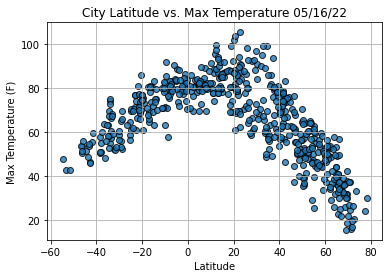

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

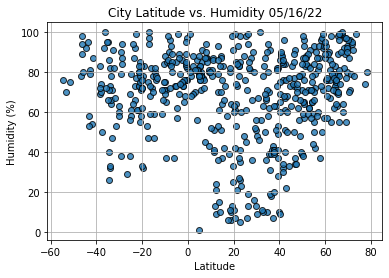

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

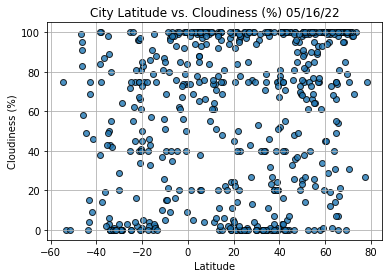

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

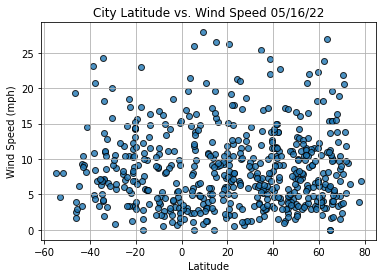

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [50]:
# Create the Hemisphere DataFrames
index13 = city_data_df.loc[13]
index13


City                    Namatanai
Country                        PG
Date          2022-05-16 18:06:08
Lat                       -3.6667
Lng                      152.4333
Max Temp                    78.98
Humidity                       79
Cloudiness                     85
Wind Speed                   4.05
Name: 13, dtype: object

In [51]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
553    False
554     True
555     True
556    False
557     True
Name: Lat, Length: 558, dtype: bool

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Albany,US,2022-05-16 18:01:51,42.6001,-73.9662,83.03,61,71,7.00
4,Dehu,IN,2022-05-16 18:06:02,18.7167,73.7667,80.65,64,24,9.37
6,Belaya Gora,RU,2022-05-16 18:06:03,68.5333,146.4167,25.92,97,85,3.40
7,Jamestown,US,2022-05-16 18:06:03,42.0970,-79.2353,57.02,96,100,13.80
8,Kapaa,US,2022-05-16 18:06:04,22.0752,-159.3190,76.98,93,50,7.83


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


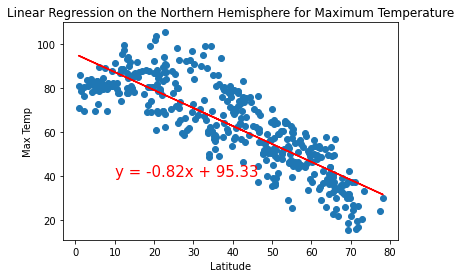

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

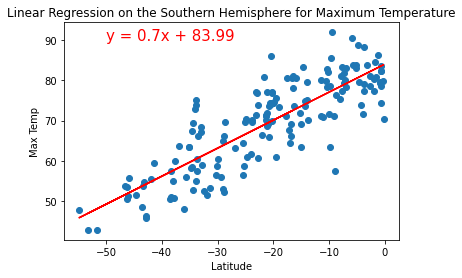

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

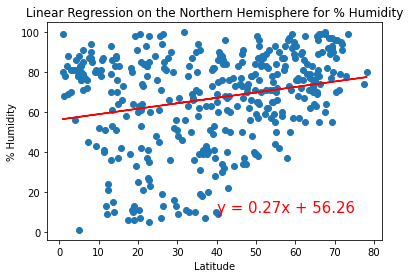

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

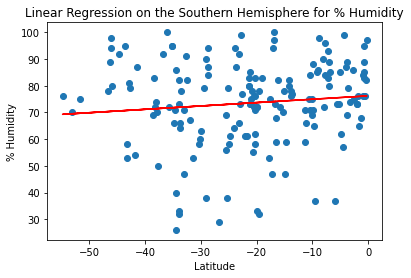

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))


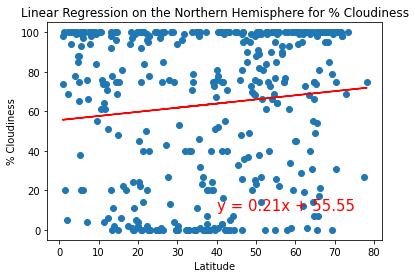

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

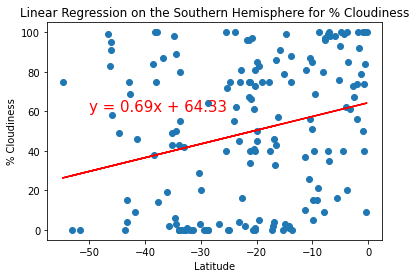

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

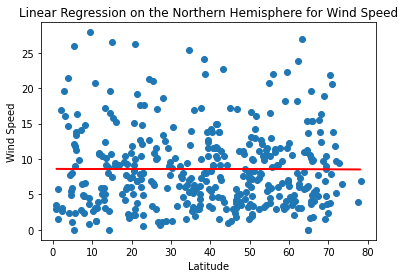

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

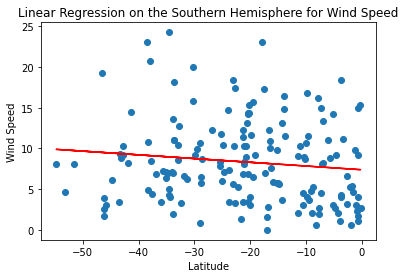

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))